# Loading S&P 500 Data

In [73]:
import pandas as pd
def load_data():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    df = pd.read_html(url, header=0)[0] # 0 is the index of the table
    return df

In [74]:
df = load_data()
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Unique Values in the Sector

In [75]:
sector_unique = df['GICS Sector'].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials',
       'Consumer Discretionary', 'Materials', 'Real Estate',
       'Communication Services', 'Energy'], dtype=object)

In [76]:
len(sector_unique)

11

## Grouping the Data According to the sector

In [77]:
sector = df.groupby('GICS Sector')

In [78]:
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,GOOGL,Alphabet Inc. (Class A),Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
Consumer Discretionary,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
Consumer Staples,ADM,ADM,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [79]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  53.0  9.107181e+05  450123.335232  37996.0  789570.00   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  23.0  8.423255e+05  640873.249366   4447.0   97594.00   
Financials              72.0  6.995565e+05  541271.213557   4962.0   77742.50   
Health Care             64.0  8.291735e+05  536818.082023   1800.0  312903.00   
Industrials             77.0  6.845063e+05  609376.147918   4281.0   76334.00   
Information Technology  64.0  8.803063e+05  496223.259383   2488.0  742719.50   
Materials               29.0  8.433121e+05  687449.351971   2969.0   73309.00   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               30.0  8.457124e+05  460276.348204   4904.0  737178.50   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   940944.0  1174922.00  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                  1035002.0  1447738.50  1841666.0  
Financials               852883.5  1137113.25  1633917.0  
Health Care              883910.0  1103212.25  1932393.0  
Industrials              728535.0  1069183.00  1967680.0  
Information Technology   883038.0  1275983.50  1730168.0  
Materials                916076.0  1396009.00  1755672.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                898492.5  1043948.50  1868275.0

In [80]:
sector.get_group('Health Care')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
10,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
36,AMGN,Amgen,Health Care,Biotechnology,"Thousand Oaks, California",1992-01-02,318154,1980
...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
487,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


# Finance Data

In [81]:
! pip install yfinance

In [82]:
import yfinance as yf

In [83]:
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'ABNB',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',


# Retrieve Stock Data

In [84]:
data = yf.download(
    # tickers list or string as well
    tickers = list(df.Symbol),
    period = "ytd",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost = True,
    threads = True,
    proxy = None

)

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=ytd)')
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')


In [85]:
data

UAL                                                    TYL  \
                 Open       High        Low      Close    Volume        Open   
Date                                                                           
2023-01-03  38.220001  38.250000  36.820000  37.209999   8149600  327.320007   
2023-01-04  37.619999  39.849998  37.560001  39.720001   8743700  322.619995   
2023-01-05  39.599998  41.270000  39.430000  41.240002   8292700  316.859985   
2023-01-06  41.410000  42.279999  41.049999  42.240002   7728200  309.649994   
2023-01-09  42.570000  44.189999  42.259998  43.349998  10072200  315.200012   
...               ...        ...        ...        ...       ...         ...   
2023-11-27  39.520000  39.599998  38.880001  39.209999   5153400  408.869995   
2023-11-28  39.299999  39.410000  38.320000  38.959999   6732000  410.220001   
2023-11-29  39.279999  40.220001  39.189999  39.250000   5970600  412.440002   
2023-11-30  39.590000  39.669998  38.680000  39.400002   7059700  407.589996   
2023-12-01  39.480000  40.365002  39.180000  40.240002  10378895  408.500000   

                                                        ...        LYV  \
                  High         Low       Close  Volume  ...       Open   
Date                                                    ...              
2023-01-03  331.440002  317.929993  319.329987  314600  ...  70.809998   
2023-01-04  324.839996  315.890015  320.679993  217800  ...  69.330002   
2023-01-05  317.010010  305.950012  306.519989  285300  ...  70.599998   
2023-01-06  312.570007  301.739990  310.910004  208200  ...  72.360001   
2023-01-09  327.250000  313.410004  318.989990  327300  ...  70.959999   
...                ...         ...         ...     ...  ...        ...   
2023-11-27  413.709991  407.390015  411.269989  151500  ...  86.820000   
2023-11-28  411.790009  406.630005  407.149994  140100  ...  85.820000   
2023-11-29  417.010010  405.690002  407.309998  208600  ...  84.629997   
2023-11-30  408.970001  401.410004  408.839996  301900  ...  83.820000   
2023-12-01  413.890015  407.529999  413.730011  161261  ...  84.190002   

                                                            ANET              \
                 High        Low      Close   Volume        Open        High   
Date                                                                           
2023-01-03  71.050003  68.519997  68.860001  1296200  122.910004  123.779999   
2023-01-04  71.629997  69.040001  71.010002  1717700  120.599998  121.099998   
2023-01-05  72.370003  69.900002  71.660004  1727400  112.370003  112.370003   
2023-01-06  73.629997  71.800003  72.379997  1374700  110.199997  113.000000   
2023-01-09  72.349998  70.449997  72.260002  4235400  113.769997  117.330002   
...               ...        ...        ...      ...         ...         ...   
2023-11-27  87.489998  85.900002  85.959999  1715000  218.270004  221.270004   
2023-11-28  86.559998  84.519997  84.540001  1623500  218.100006  220.479996   
2023-11-29  85.000000  83.500000  83.599998  2091900  220.130005  223.520004   
2023-11-30  84.360001  83.180000  84.220001  2039800  218.660004  220.820007   
2023-12-01  84.910004  83.790001  84.250000  1308155  219.009995  218.809998   

                                             
                   Low       Close   Volume  
Date                                         
2023-01-03  118.900002  120.910004  1693700  
2023-01-04  113.150002  113.839996  4614100  
2023-01-05  109.169998  109.489998  3707900  
2023-01-06  108.910004  112.449997  2328500  
2023-01-09  113.699997  114.870003  1811300  
...                ...         ...      ...  
2023-11-27  217.050003  218.669998  1414000  
2023-11-28  216.580002  217.250000  1570500  
2023-11-29  218.664993  219.300003  1690100  
2023-11-30  217.029999  219.710007  2198300  
2023-12-01  215.259995  216.639999  1489670  

[231 rows x 2517 columns]

In [86]:
data['AAPL']

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,129.555841,130.172390,123.479803,124.374802,112117500
2023-01-04,126.184691,127.944857,124.384755,125.657639,89113600
2023-01-05,126.423353,127.059795,124.066532,124.325081,80962700
2023-01-06,125.309594,129.565795,124.195816,128.899521,87754700
2023-01-09,129.744788,132.668449,129.168010,129.426559,70790800
...,...,...,...,...,...
2023-11-27,189.919998,190.669998,188.899994,189.789993,40552600
2023-11-28,189.779999,191.080002,189.399994,190.399994,38415400
2023-11-29,190.899994,192.089996,188.970001,189.369995,43014200


In [87]:
df2 = pd.DataFrame(data['AAPL'].Close)
df2['Date'] = df2.index
df2

,Close,Date
Date,,
2023-01-03,124.374802,2023-01-03
2023-01-04,125.657639,2023-01-04
2023-01-05,124.325081,2023-01-05
2023-01-06,128.899521,2023-01-06
2023-01-09,129.426559,2023-01-09
...,...,...
2023-11-27,189.789993,2023-11-27
2023-11-28,190.399994,2023-11-28
2023-11-29,189.369995,2023-11-29


# Plot Closing Price of Query Symbol

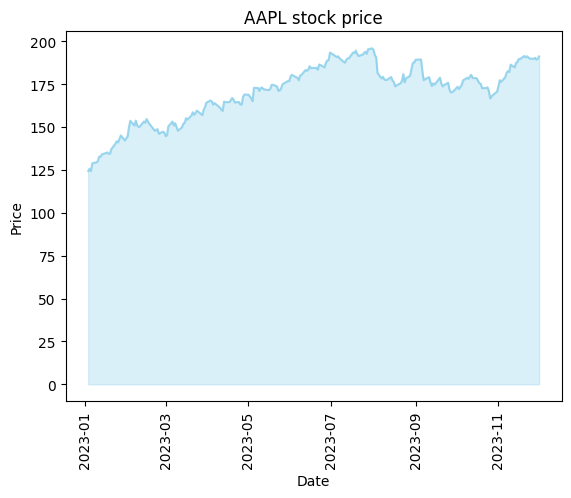

In [88]:
import matplotlib.pyplot as plt
plt.fill_between(df2.Date, df2.Close, color="skyblue", alpha=0.3)
plt.plot(df2.Date, df2.Close, color="skyblue", alpha=0.8)
plt.xticks(rotation=90)
plt.title('AAPL stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## General Function to create the Plots

In [89]:
import matplotlib.pyplot as plt
def price_plot(symbol):
    df = pd.DataFrame(data[symbol].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color="skyblue", alpha=0.3)
    plt.plot(df.Date, df.Close, color="skyblue", alpha=0.8)
    plt.xticks(rotation=90)
    plt.title(symbol, fontweight='bold')
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price', fontweight='bold')
    return plt.show()


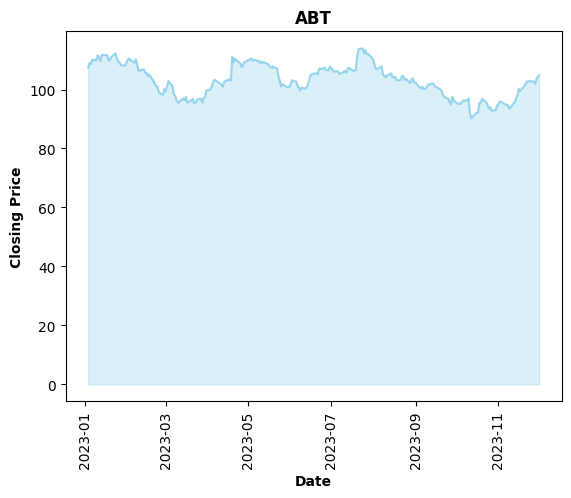

In [90]:
price_plot('ABT')

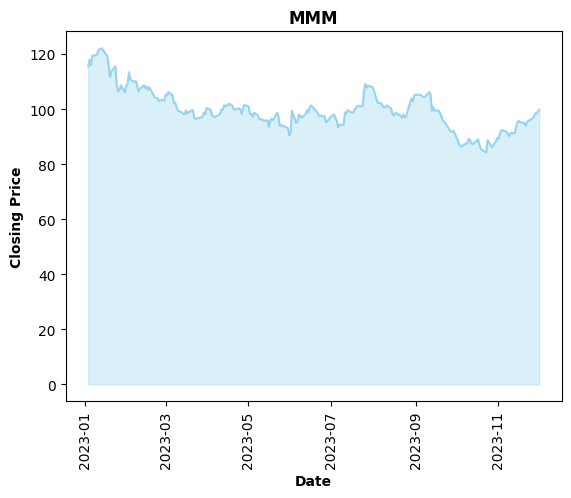

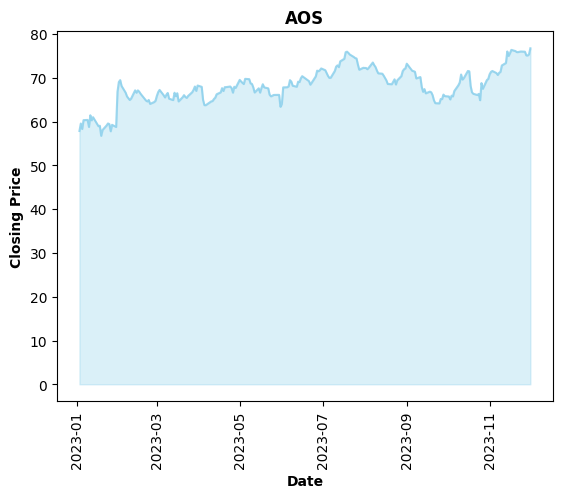

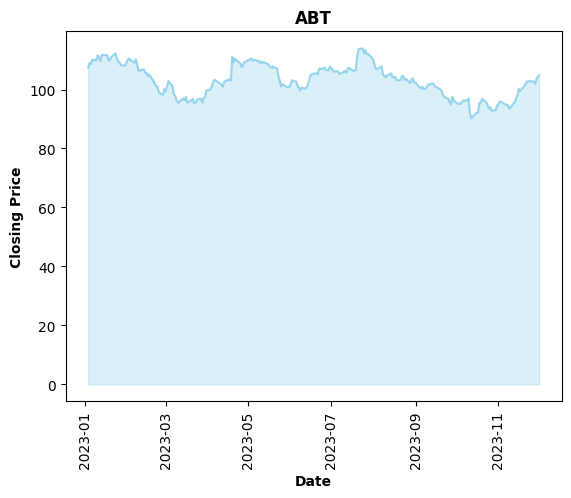

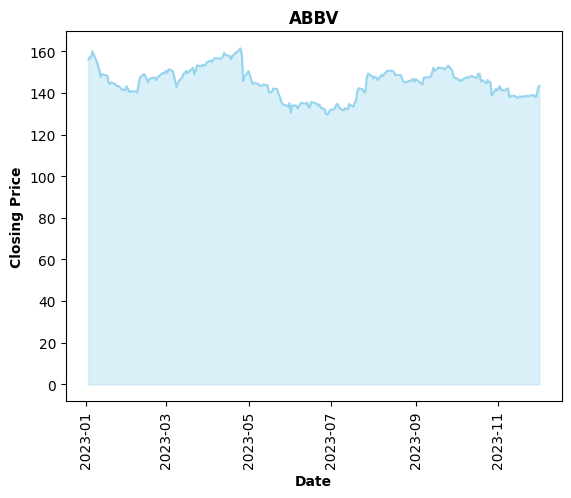

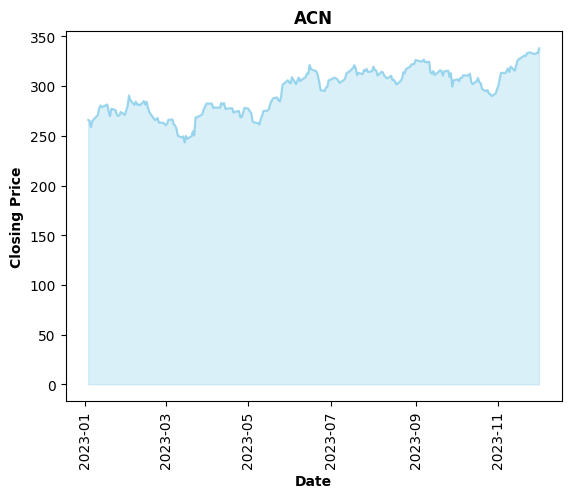

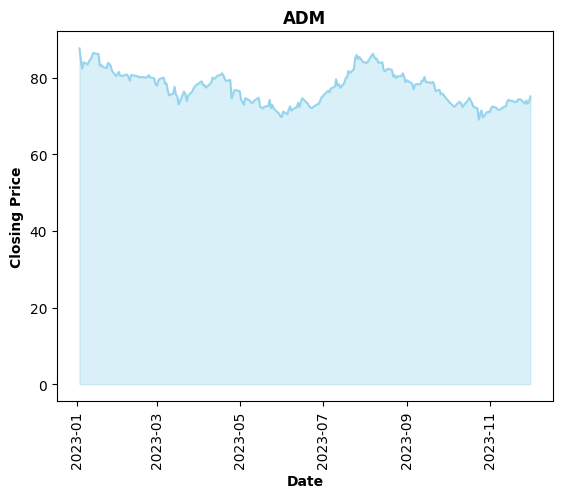

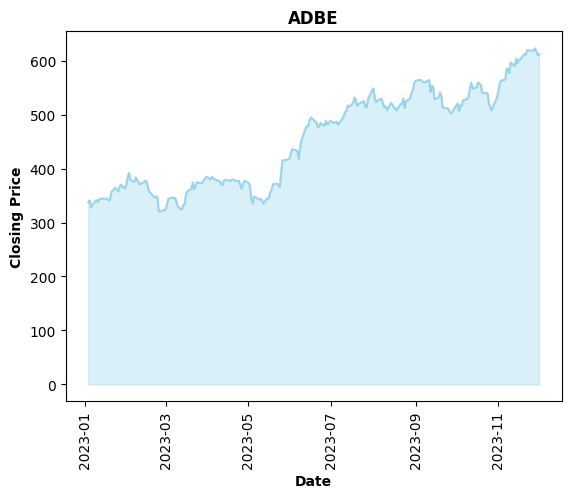

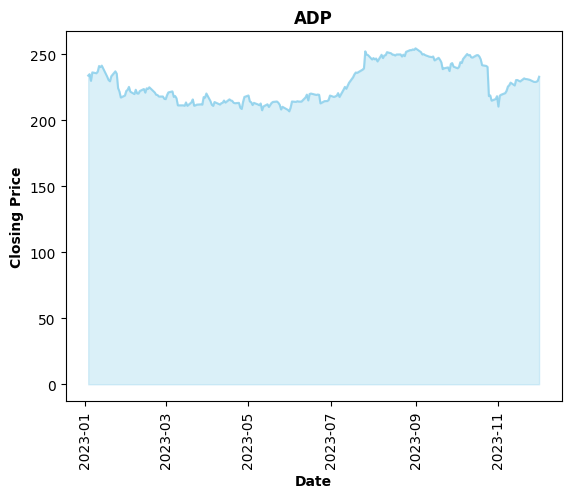

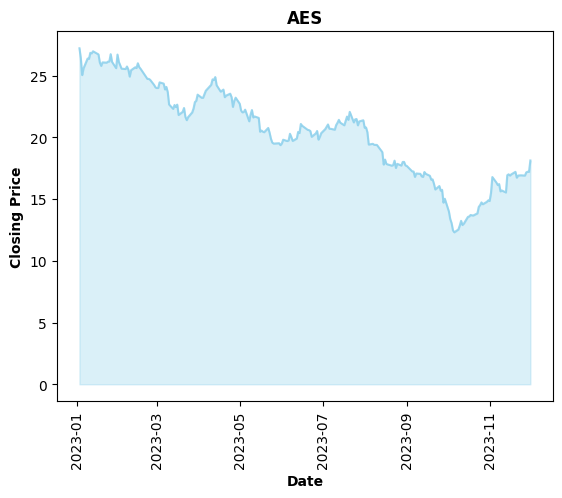

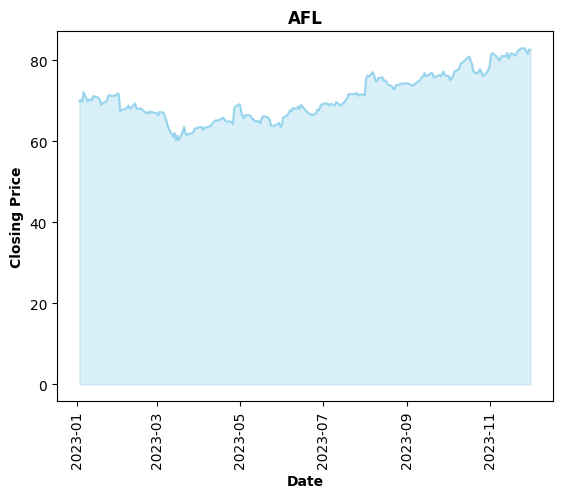

In [91]:
for i in list(df.Symbol)[:10]:
    price_plot(i)